# Assignment
In this assignment, you'll be working with the heart disease dataset from the UC Irvine Machine Learning Repository.

Load the dataset from the Thinkful's database. Here's the credentials you can use to connect to the database:

`postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'heartdisease'`

The dataset needs some preprocessing. So, apply the following code before working with the dataset:

`# Define the features and the outcome
X = heartdisease_df.iloc[:, :13]
y = heartdisease_df.iloc[:, 13]`

`# Replace missing values (marked by ?) with a 0
X = X.replace(to_replace='?', value=0)`

`# Binarize y so that 1 means heart disease diagnosis and 0 means no diagnosis
y = np.where(y > 0, 0, 1)`

Here, X will be your features and in y we hold the labels. If y is equal to 1, then it indicates that the corresponding patient has heart disease and if y is equal to 0, then the patient doesn't have heart disease.

To complete this assignment, submit a link to a Jupyter notebook containing your solutions to the following tasks below, and plan on discussing with your mentor. You can also take a look at these example solutions.

Produce dendrograms for the heart disease dataset using three different linkage methods: complete, average and ward. Which linkage method do you think produces more reasonable result?

Apply agglomerative clustering to the heart disease data by setting n_clusters=2. Try the three linkage methods above and get ARI and silhouette scores for each of your solutions. Compare the results with each other and with that of the k-means solution that you implemented in the assignment of the previous checkpoint. Which algorithm and setting does perform better?

In [1]:
%reload_ext nb_black

<IPython.core.display.Javascript object>

In [19]:
import numpy as np
import pandas as pd
import scipy
from scipy.cluster.hierarchy import dendrogram, linkage

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn import datasets
from sklearn.metrics import silhouette_score, adjusted_rand_score

from sqlalchemy import create_engine
import warnings

warnings.filterwarnings("ignore")

<IPython.core.display.Javascript object>

In [13]:
postgres_user = "dsbc_student"
postgres_pw = "7*.8G9QH21"
postgres_host = "142.93.121.174"
postgres_port = "5432"
postgres_db = "heartdisease"


engine = create_engine(
    "postgresql://{}:{}@{}:{}/{}".format(
        postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db
    )
)

heartdisease_df = pd.read_sql_query("select * from heartdisease", con=engine)

# no need for an open connection,
# as we're only doing a single query
engine.dispose()


# The dataset needs some preprocessing.
# So, apply the following code before working with the dataset:

# Define the features and the outcome
X = heartdisease_df.iloc[1:, :13]
y = heartdisease_df.iloc[1:, 13]

# Replace missing values (marked by ?) with a 0
X = X.replace(to_replace="?", value=0)

# Binarize y so that 1 means heart disease diagnosis and 0 means no diagnosis
y = np.where(y > 0, 0, 1)

<IPython.core.display.Javascript object>

In [14]:
# Standarizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

<IPython.core.display.Javascript object>

## Ward linkage

In [15]:
# Defining the agglomerative clustering
agg_cluster = AgglomerativeClustering(
    linkage="ward", affinity="euclidean", n_clusters=2
)

# Fit model
clusters = agg_cluster.fit_predict(X_std)

<IPython.core.display.Javascript object>

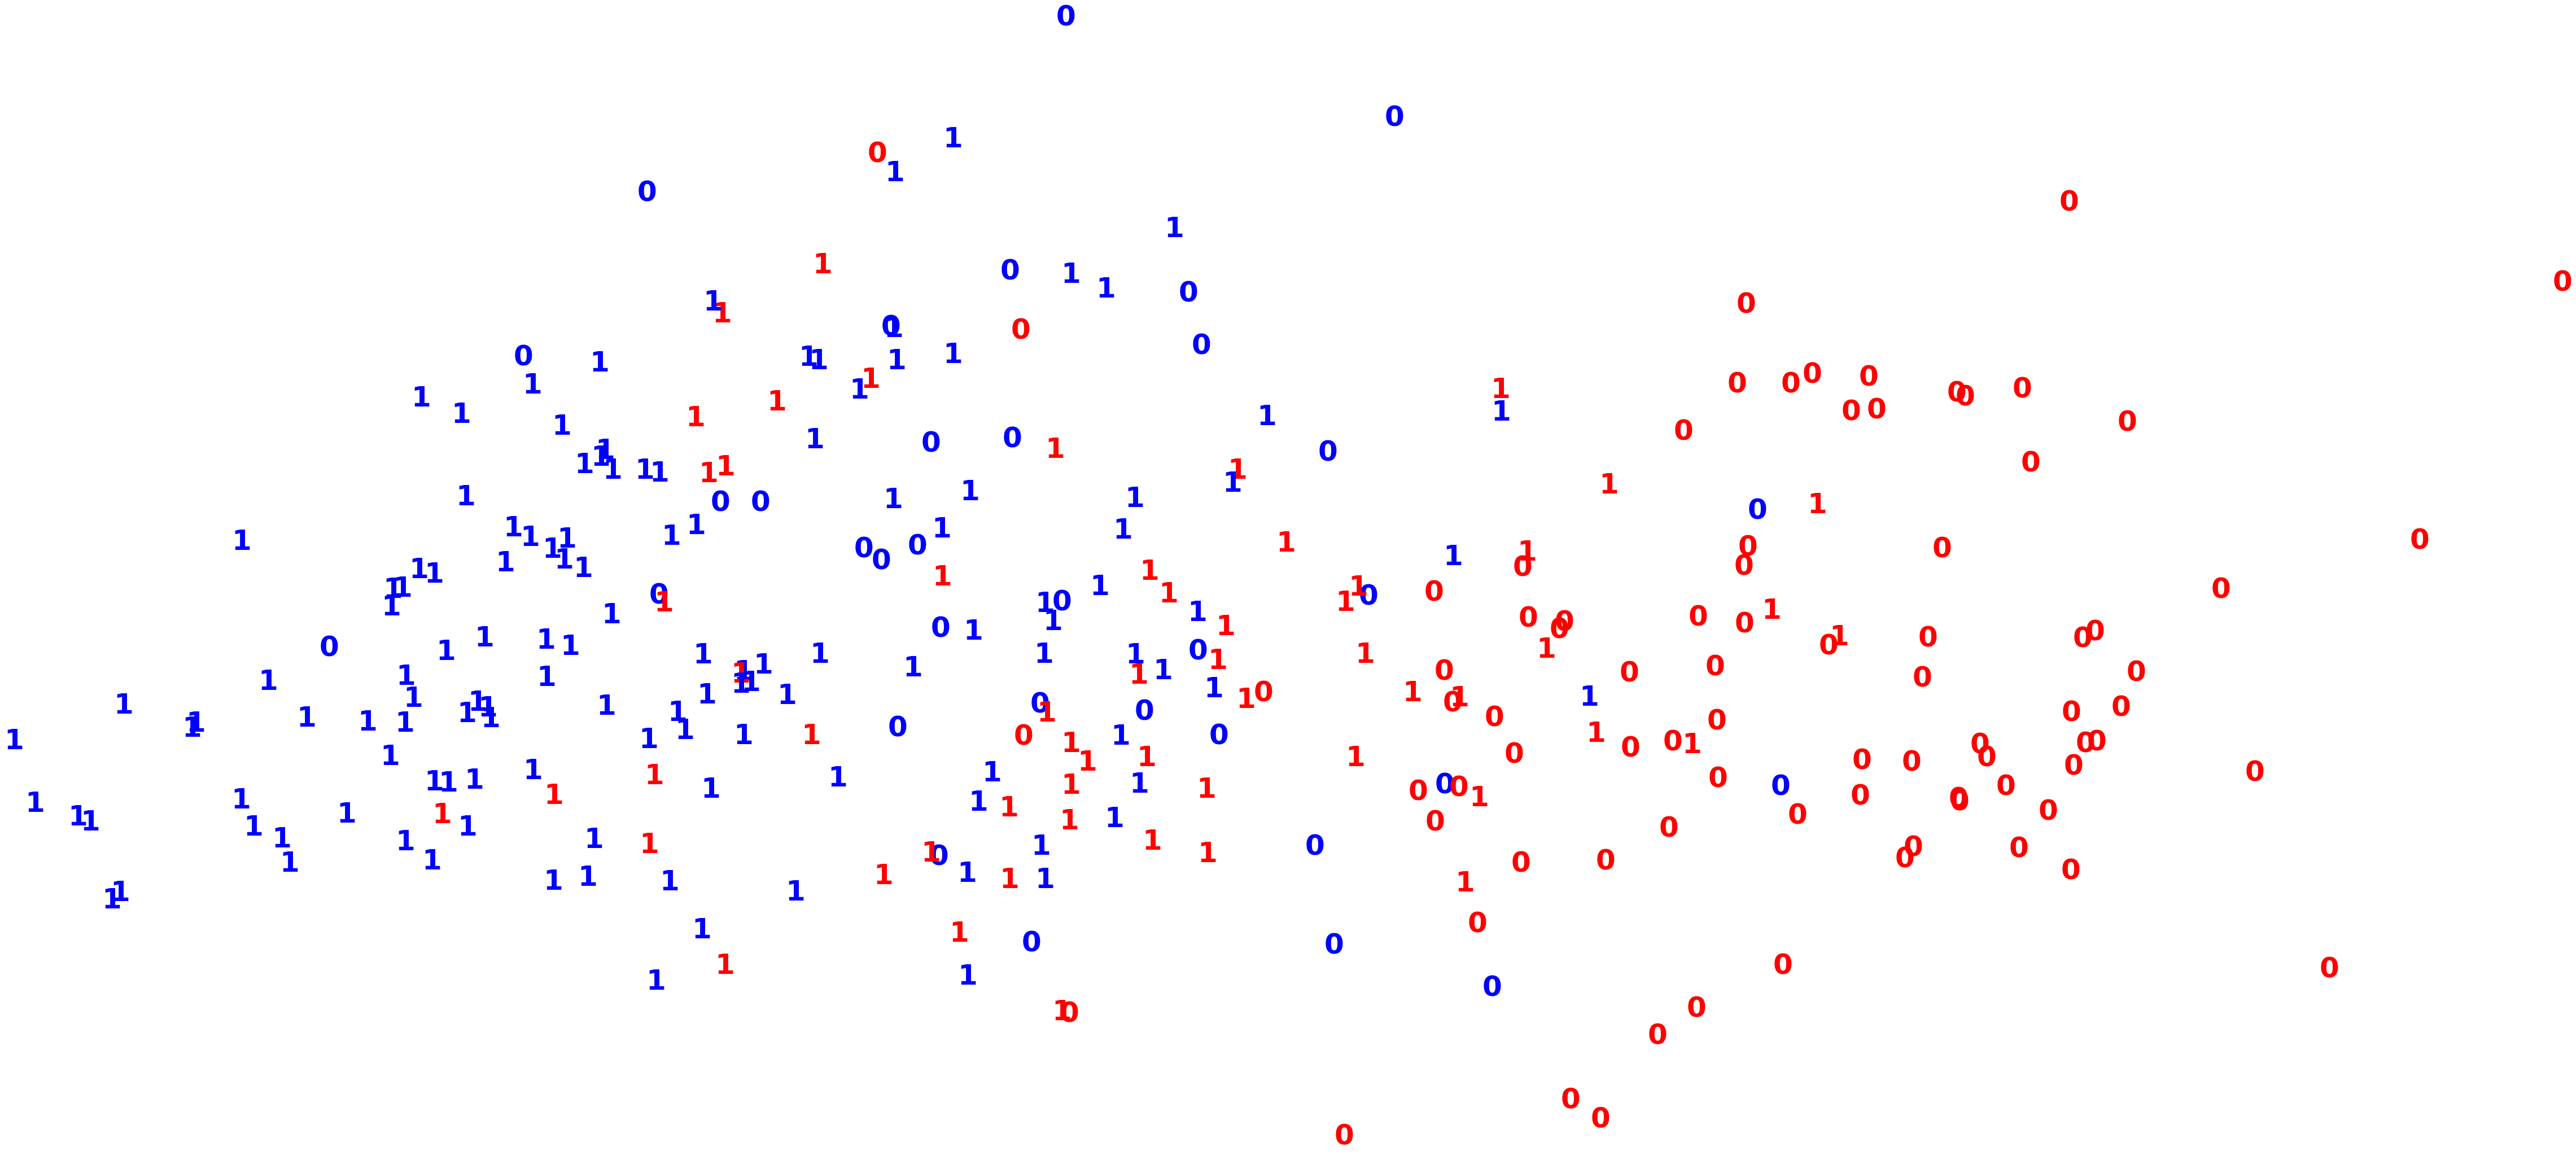

<IPython.core.display.Javascript object>

In [17]:
pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10, 5))
colours = "rbg"
for i in range(pca.shape[0]):
    plt.text(
        pca[i, 0],
        pca[i, 1],
        str(clusters[i]),
        color=colours[y[i]],
        fontdict={"weight": "bold", "size": 50},
    )

plt.xticks([])
plt.yticks([])
plt.axis("off")
plt.show()

In [20]:
print(
    "Adjusted Rand Index of the Agglomerative Clustering solution: {}".format(
        adjusted_rand_score(y, clusters)
    )
)
print(
    "The silhoutte score of the Agglomerative Clustering solution: {}".format(
        silhouette_score(X_std, clusters, metric="euclidean")
    )
)

Adjusted Rand Index of the Agglomerative Clustering solution: 0.15496125745564426
The silhoutte score of the Agglomerative Clustering solution: 0.14110248537784453


<IPython.core.display.Javascript object>

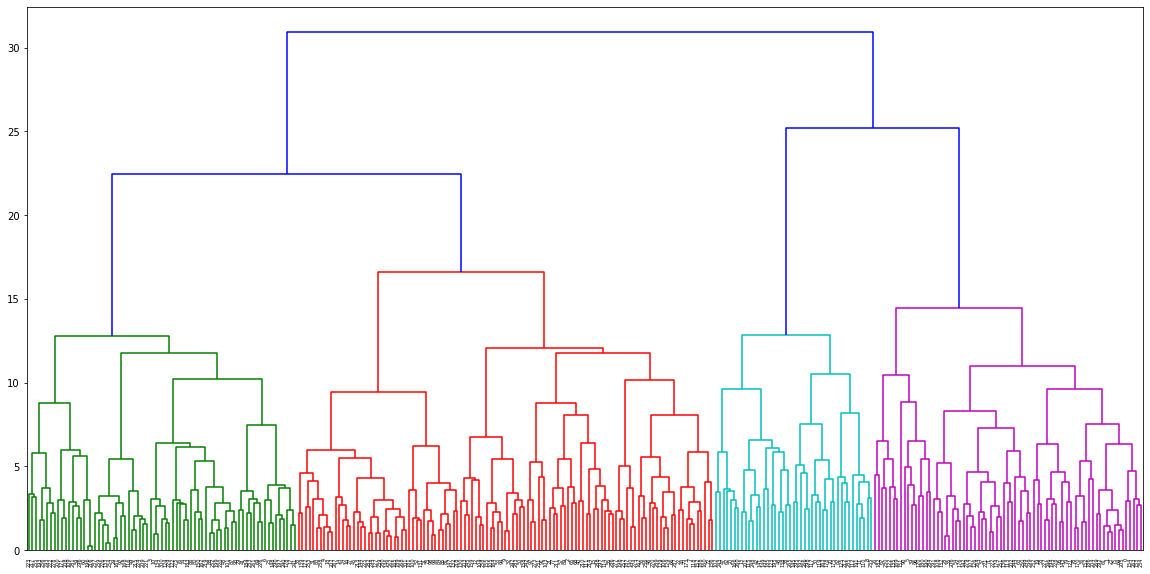

<IPython.core.display.Javascript object>

In [21]:
plt.figure(figsize=(20, 10))
dendrogram(linkage(X_std, method="ward"))
plt.show()

## Complete linkage

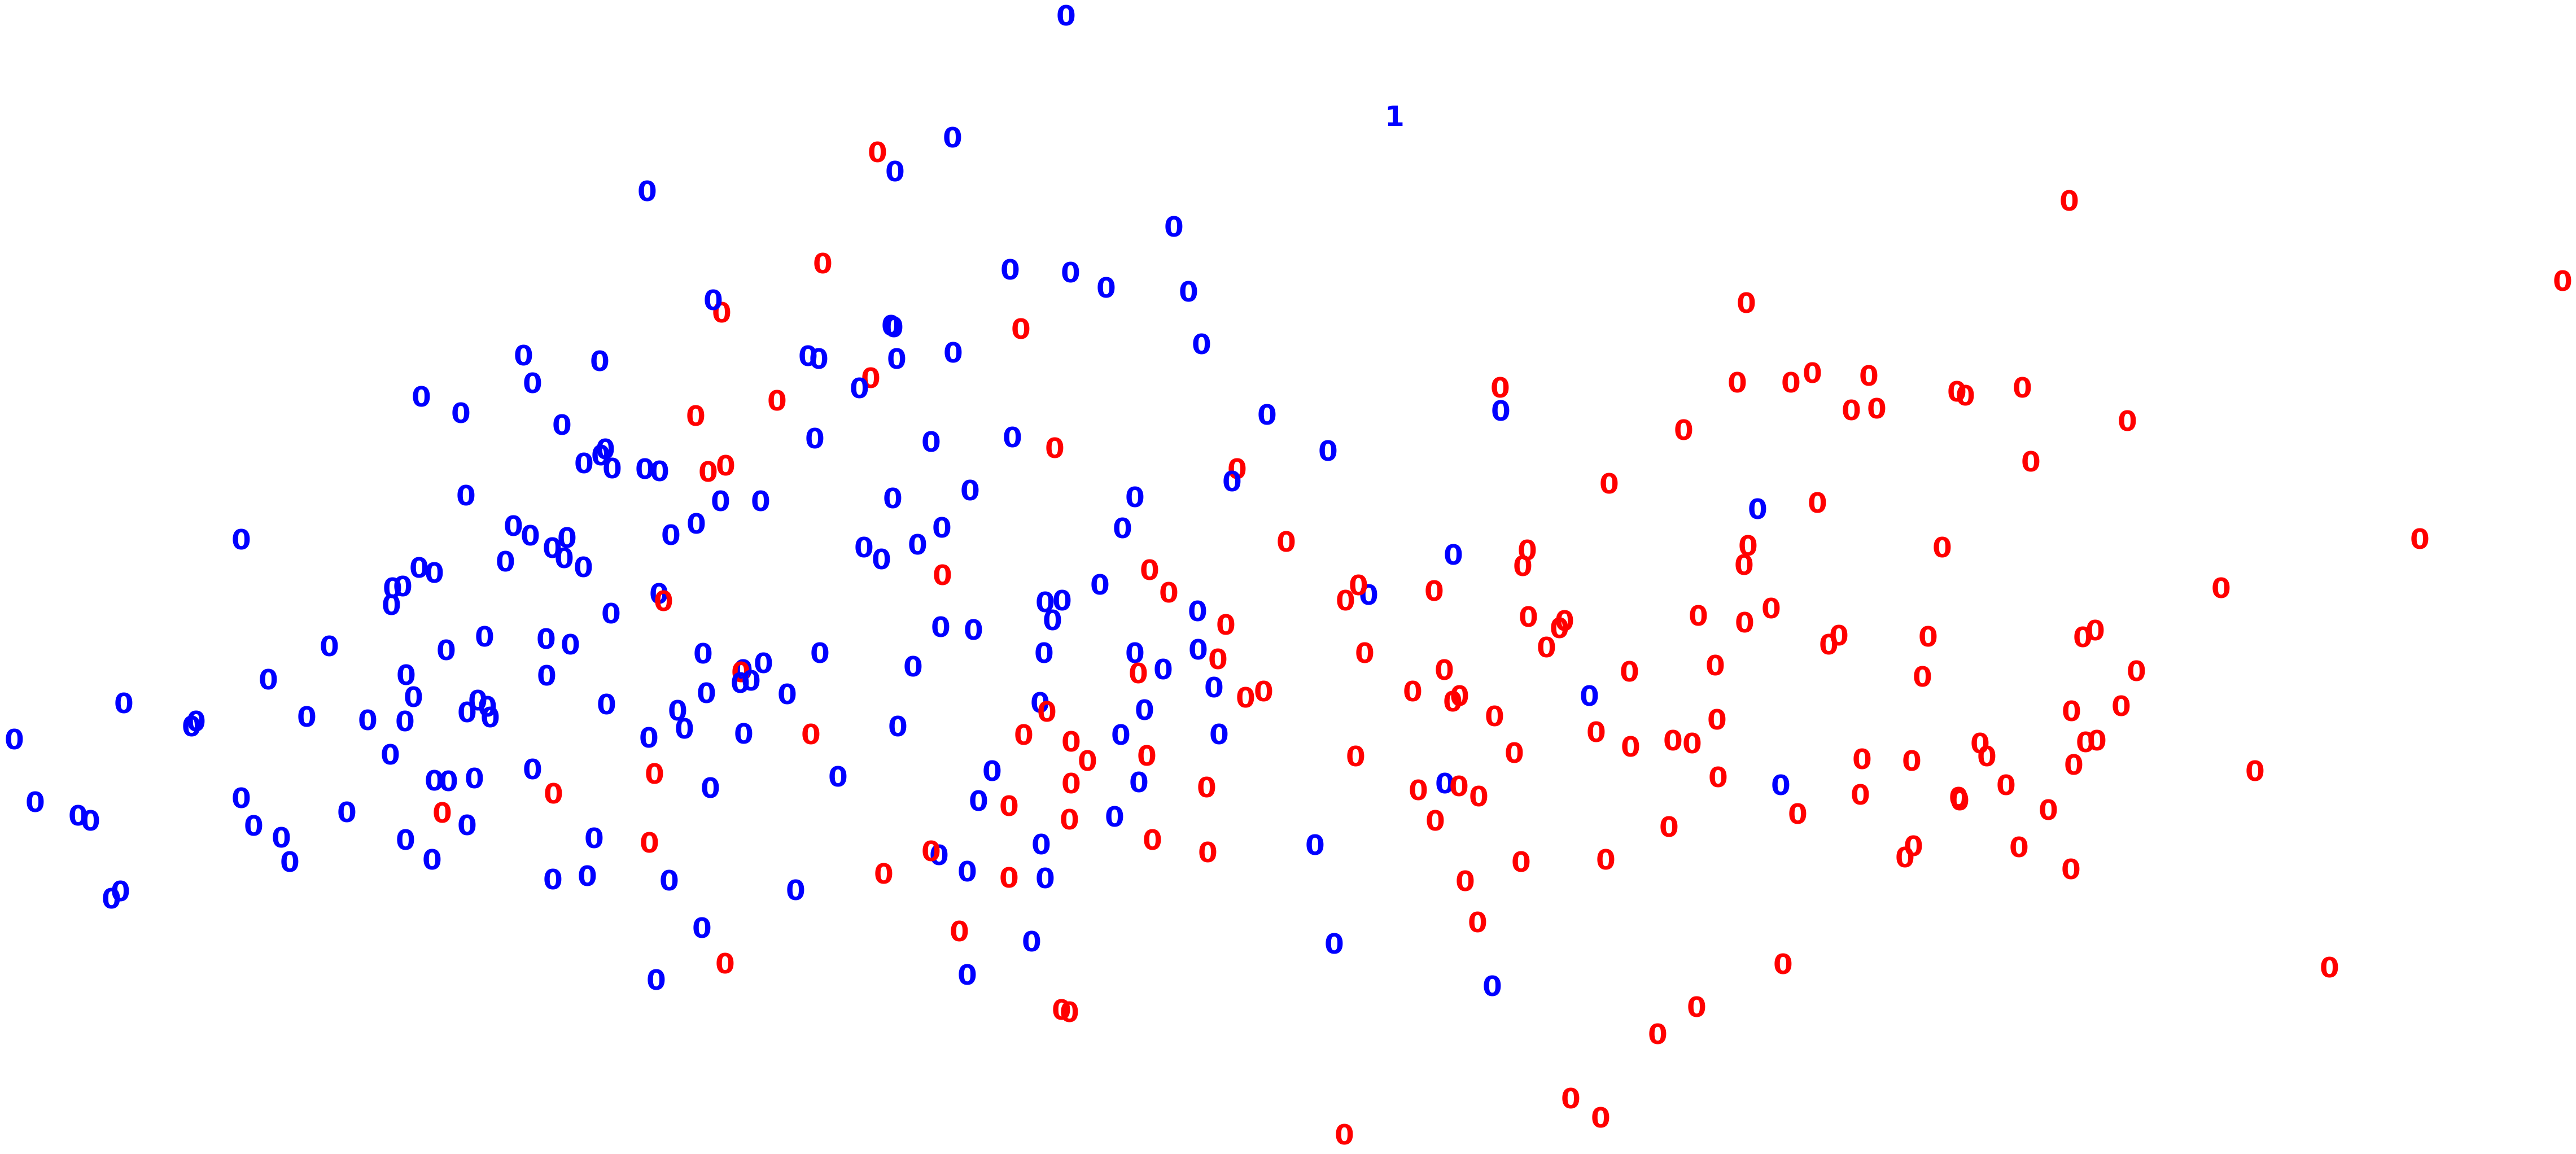

Adjusted Rand Index of the Agglomerative Clustering solution: -0.0009750554168186963
The silhoutte score of the Agglomerative Clustering solution: 0.3478419156783376


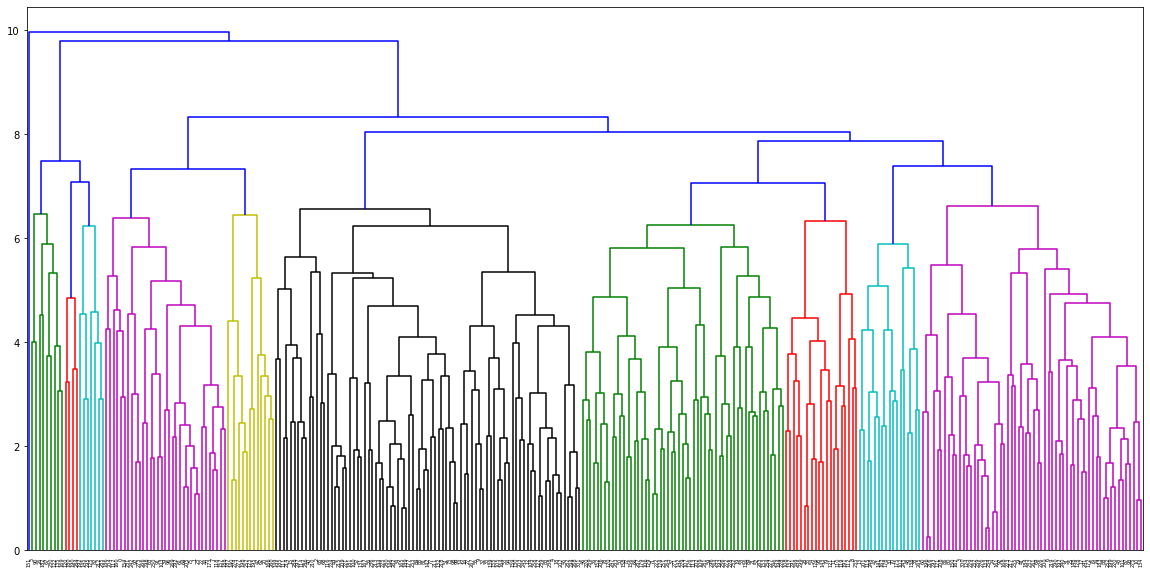

<IPython.core.display.Javascript object>

In [22]:
# Defining the agglomerative clustering
agg_cluster = AgglomerativeClustering(
    linkage="complete", affinity="euclidean", n_clusters=2
)

# Fit model
clusters = agg_cluster.fit_predict(X_std)

pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10, 5))
colours = "rbg"
for i in range(pca.shape[0]):
    plt.text(
        pca[i, 0],
        pca[i, 1],
        str(clusters[i]),
        color=colours[y[i]],
        fontdict={"weight": "bold", "size": 50},
    )

plt.xticks([])
plt.yticks([])
plt.axis("off")
plt.show()

print(
    "Adjusted Rand Index of the Agglomerative Clustering solution: {}".format(
        adjusted_rand_score(y, clusters)
    )
)
print(
    "The silhoutte score of the Agglomerative Clustering solution: {}".format(
        silhouette_score(X_std, clusters, metric="euclidean")
    )
)

plt.figure(figsize=(20, 10))
dendrogram(linkage(X_std, method="complete"))
plt.show()

## Average linkage

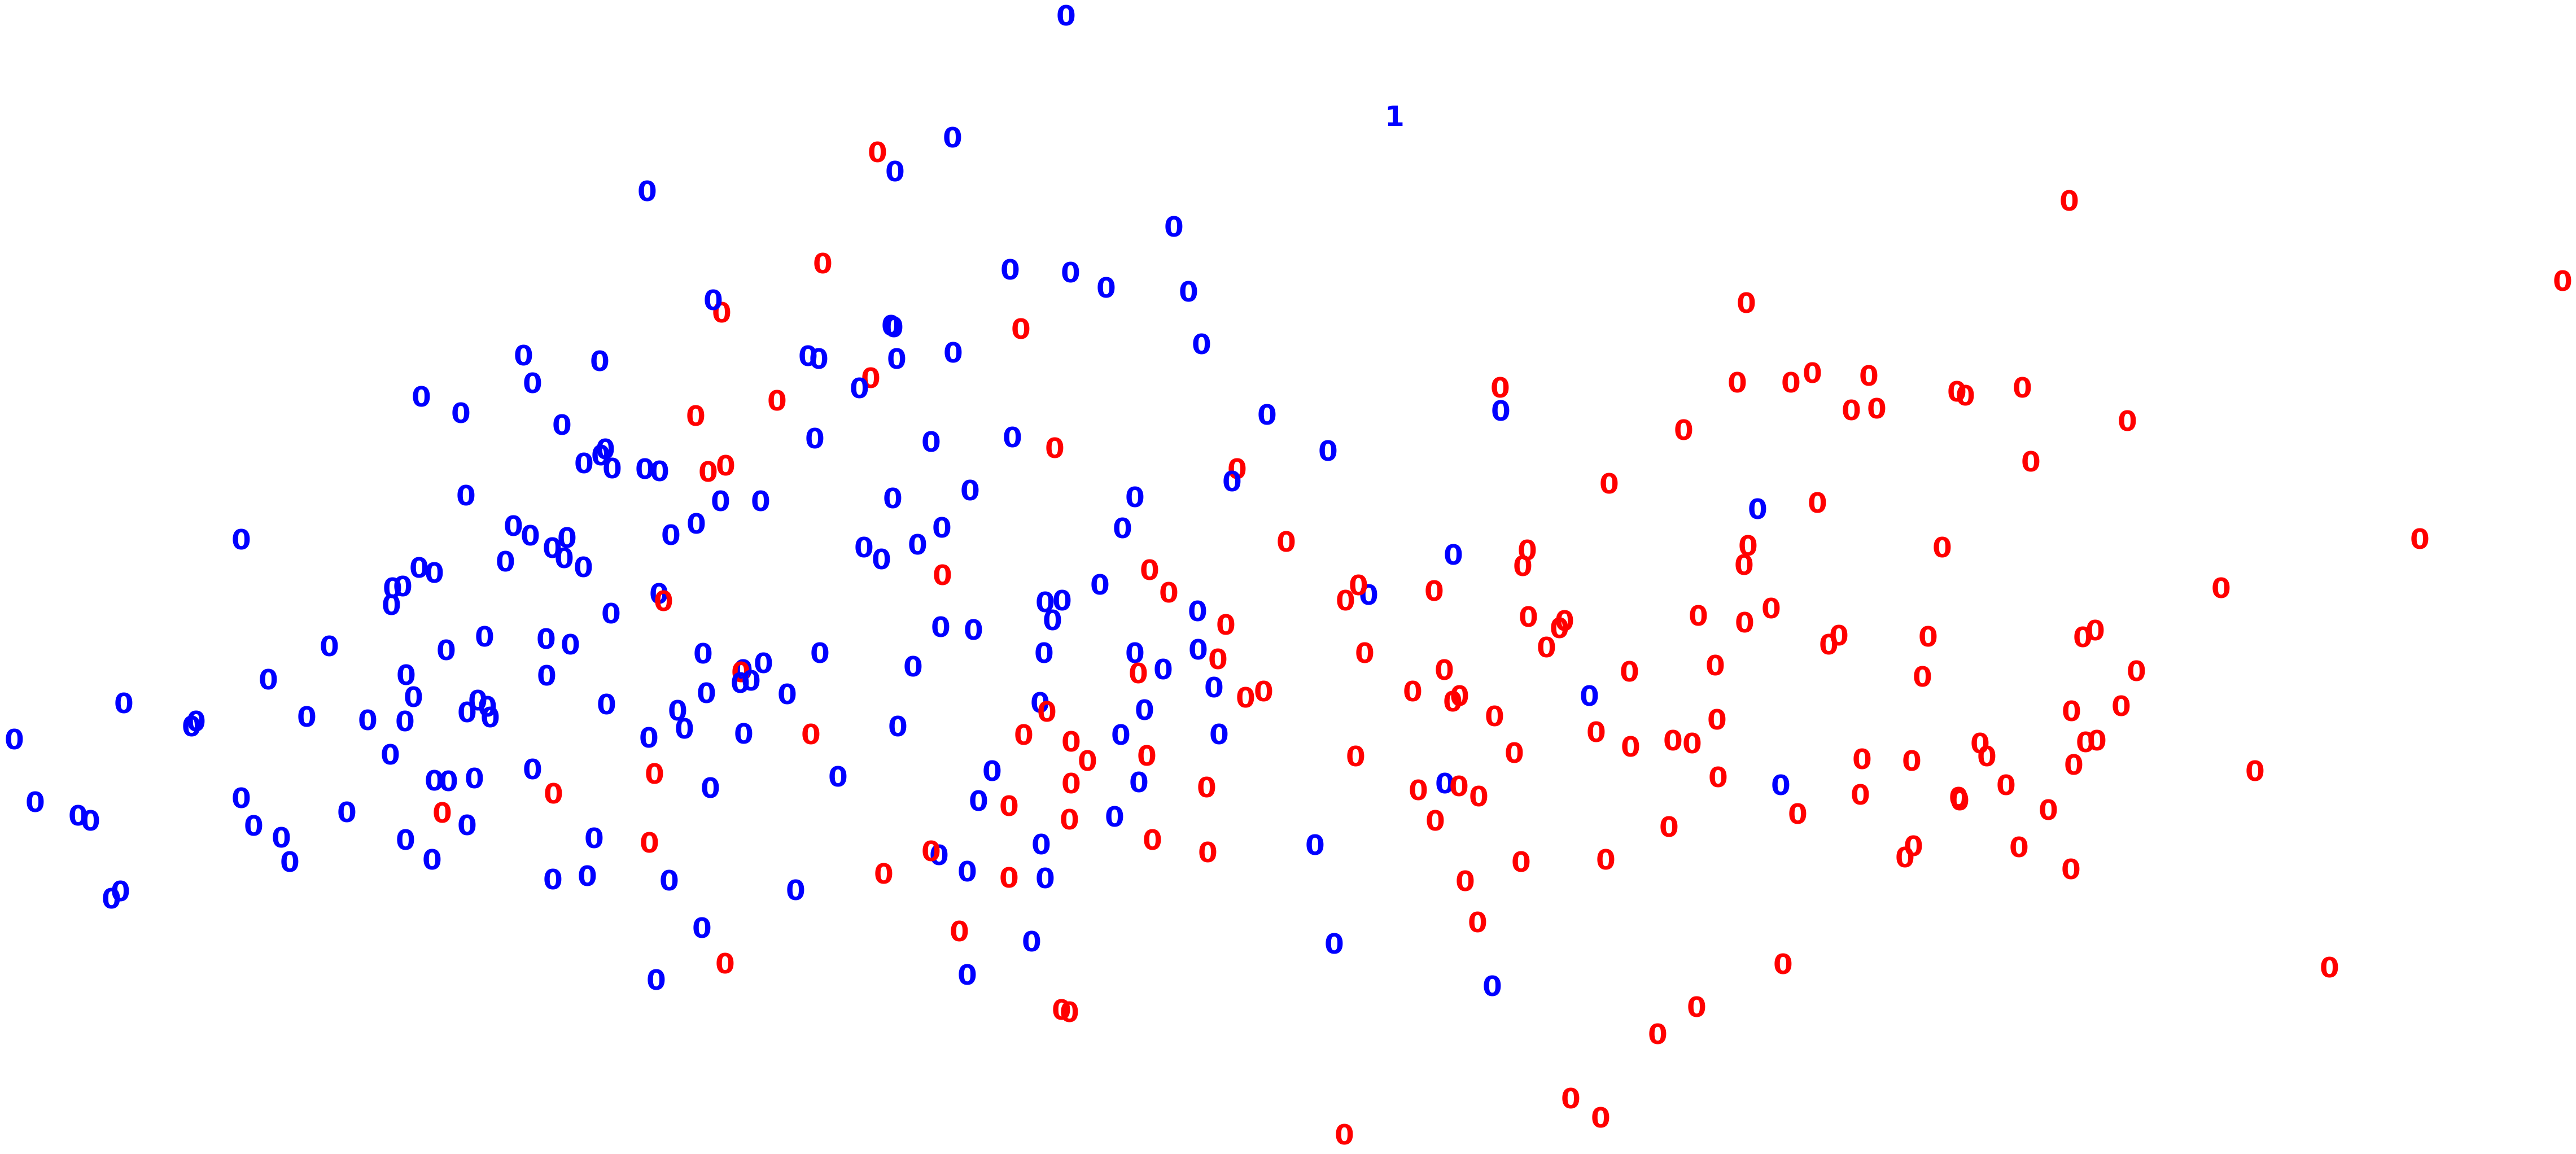

Adjusted Rand Index of the Agglomerative Clustering solution: -0.0009750554168186963
The silhoutte score of the Agglomerative Clustering solution: 0.3478419156783376


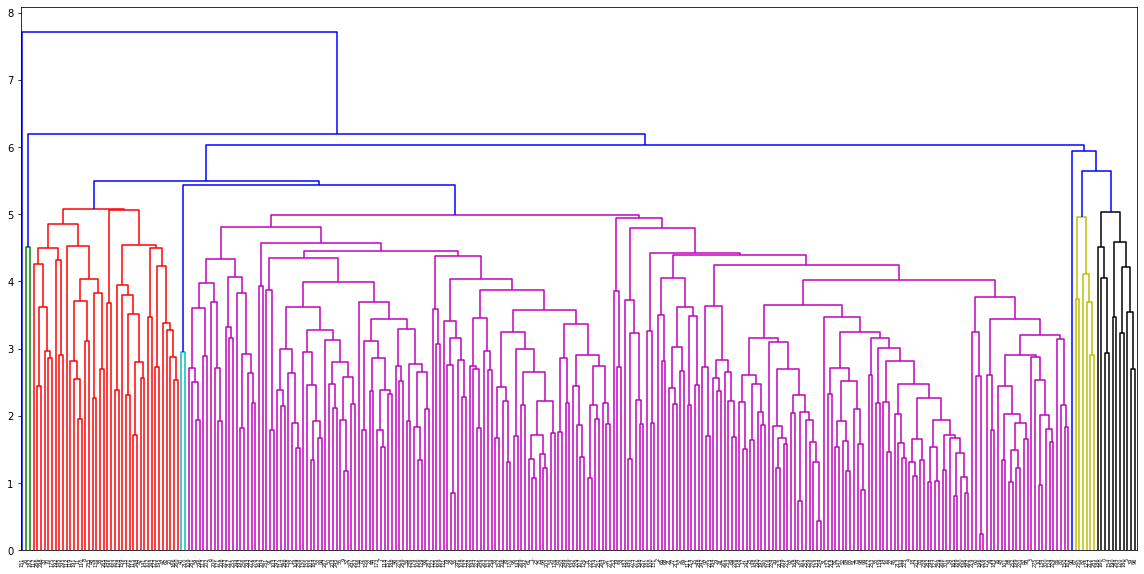

<IPython.core.display.Javascript object>

In [23]:
# Defining the agglomerative clustering
agg_cluster = AgglomerativeClustering(
    linkage="average", affinity="euclidean", n_clusters=2
)

# Fit model
clusters = agg_cluster.fit_predict(X_std)

pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10, 5))
colours = "rbg"
for i in range(pca.shape[0]):
    plt.text(
        pca[i, 0],
        pca[i, 1],
        str(clusters[i]),
        color=colours[y[i]],
        fontdict={"weight": "bold", "size": 50},
    )

plt.xticks([])
plt.yticks([])
plt.axis("off")
plt.show()

print(
    "Adjusted Rand Index of the Agglomerative Clustering solution: {}".format(
        adjusted_rand_score(y, clusters)
    )
)

print(
    "The silhoutte score of the Agglomerative Clustering solution: {}".format(
        silhouette_score(X_std, clusters, metric="euclidean")
    )
)

plt.figure(figsize=(20, 10))
dendrogram(linkage(X_std, method="average"))
plt.show()

The ward linkage method is the only solution that even kind of produces okay clustering.  K-means does a much better job than agglomerative.